In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
#DATA PREPROCESSING
df = pd.read_csv("tracks_features.csv")
df1 = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 19, 20, 21, 22, 23]], axis=1)
df1 = pd.DataFrame(df1)
df1

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.470,0.978,0.0727,0.02610,0.000011,0.3560,0.503
1,0.599,0.957,0.1880,0.01290,0.000071,0.1550,0.489
2,0.315,0.970,0.4830,0.02340,0.000002,0.1220,0.370
3,0.440,0.967,0.2370,0.16300,0.000004,0.1210,0.574
4,0.426,0.929,0.0701,0.00162,0.105000,0.0789,0.539
...,...,...,...,...,...,...,...
1204020,0.264,0.966,0.0672,0.00935,0.002240,0.3370,0.415
1204021,0.796,0.701,0.0883,0.10400,0.644000,0.0749,0.781
1204022,0.785,0.796,0.0564,0.03040,0.918000,0.0664,0.467
1204023,0.665,0.856,0.0409,0.00007,0.776000,0.1170,0.227


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   danceability      1204025 non-null  float64
 1   energy            1204025 non-null  float64
 2   speechiness       1204025 non-null  float64
 3   acousticness      1204025 non-null  float64
 4   instrumentalness  1204025 non-null  float64
 5   liveness          1204025 non-null  float64
 6   valence           1204025 non-null  float64
dtypes: float64(7)
memory usage: 64.3 MB


<Axes: >

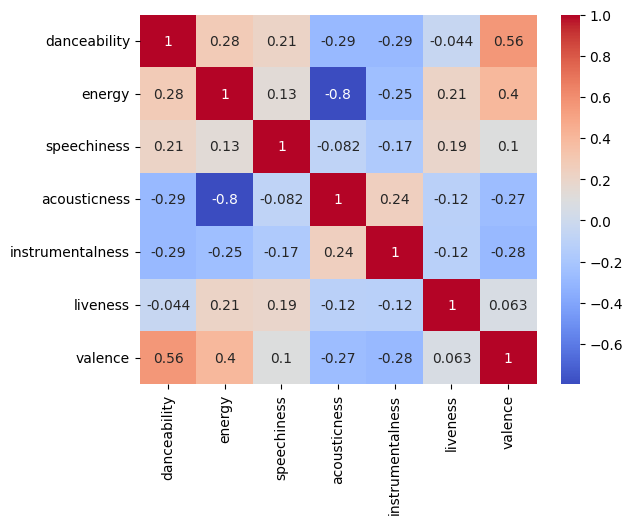

In [5]:
correlation = df1.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [6]:
#SCALING DATA
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1)
scaled_df

array([[-0.12156168,  1.5897166 , -0.10071608, ..., -0.75169143,
         0.85559944,  0.27732973],
       [ 0.55856939,  1.51845377,  0.8933238 , ..., -0.75153278,
        -0.25822706,  0.22557075],
       [-0.93877343,  1.56256886,  3.4366175 , ..., -0.751715  ,
        -0.44109409, -0.21438062],
       ...,
       [ 1.53922349,  0.97210543, -0.24124383, ...,  1.68792467,
        -0.74919734,  0.1442352 ],
       [ 0.90654342,  1.17571351, -0.37487452, ...,  1.31055037,
        -0.46880122, -0.74306168],
       [ 1.28087913,  0.67348025, -0.26279717, ...,  0.03491897,
         0.42890969, -0.82809429]])

In [30]:
#BUILDING KMEANS MODEL
kmeans = KMeans(init="random", n_clusters=10, n_init=10, max_iter=300, random_state=26)
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=10, n_init=10, random_state=26)

In [31]:
#ELBOW METHOD MODELLING
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 26
}

sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

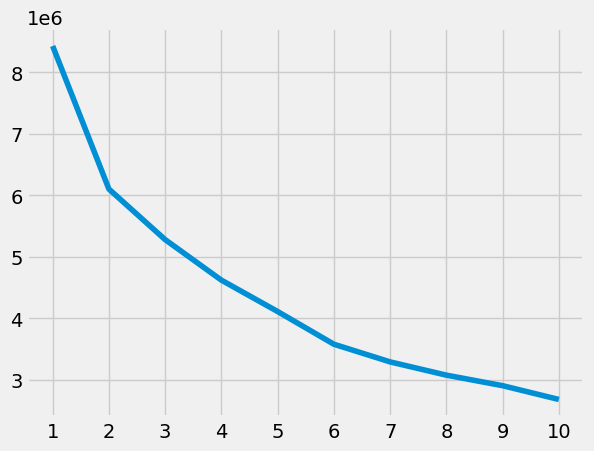

In [32]:
#VISUALIZING ELBOW METHOD
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.show()

In [33]:
print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)

2681674.7770213527
[[-1.10745974 -1.2265807  -0.33720387  1.13331371  1.47961915 -0.37069558
  -1.0960299 ]
 [ 0.65052885 -0.34011943  6.2029785   0.67936406 -0.64883636  1.32752642
   0.29375724]
 [-0.17990703  0.5085729   0.09934527 -0.26535798 -0.28734128  3.02521094
   0.10685663]
 [ 0.99821896  0.4748541   2.10298742 -0.57138835 -0.659894   -0.01542343
   0.42830137]
 [-0.81896872 -1.10317889 -0.34244756  1.02295357 -0.59703945 -0.2905955
  -0.89161941]
 [-0.07165948  0.76300643 -0.16042564 -0.94635331  1.3438148  -0.1449436
  -0.33292463]
 [ 0.88710994  0.7088179  -0.21532077 -0.70189352 -0.56235417 -0.20904554
   1.19497601]
 [ 0.5039597  -0.45867358 -0.29285509  0.61876041 -0.67402559 -0.27893762
   0.30880315]
 [ 0.30686605 -0.57038104 -0.26394445  0.92941875  1.42972024 -0.32610393
   0.58965521]
 [-0.32508556  0.84025907 -0.14630733 -0.96130121 -0.63610962 -0.07298623
  -0.27376132]]
42


In [34]:
clusters = kmeans.predict(scaled_df)
print(clusters)

[9 9 3 ... 5 5 9]


In [35]:
pca = PCA(n_components=2)
df2 = pca.fit_transform(scaled_df)

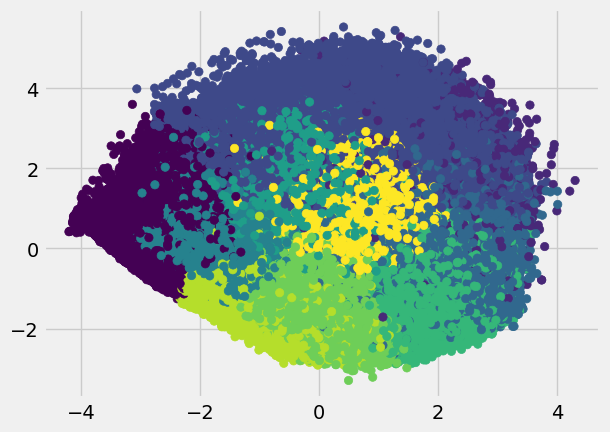

In [36]:
plt.scatter(df2[:,0], df2[:,1], c=clusters)
plt.show()

In [37]:
#CLUSTER CHARACTERISTICS
dcluster = df1.copy()
dcluster['cluster'] = clusters

gb = dcluster.groupby('cluster').mean()
print(gb)

         danceability    energy  speechiness  acousticness  instrumentalness  \
cluster                                                                        
0            0.282684  0.148025     0.045257      0.883229          0.839580   
1            0.616442  0.409309     0.803874      0.708443          0.038714   
2            0.458929  0.659421     0.095906      0.344515          0.174738   
3            0.682383  0.649470     0.328308      0.226653          0.034561   
4            0.337823  0.184503     0.044664      0.840740          0.058158   
5            0.479608  0.734330     0.065774      0.082327          0.788566   
6            0.661328  0.718387     0.059406      0.176426          0.071342   
7            0.588673  0.374431     0.050415      0.685112          0.029199   
8            0.550855  0.340510     0.053753      0.805824          0.820888   
9            0.431409  0.757120     0.067407      0.076470          0.043533   

         liveness   valence  
cluster  

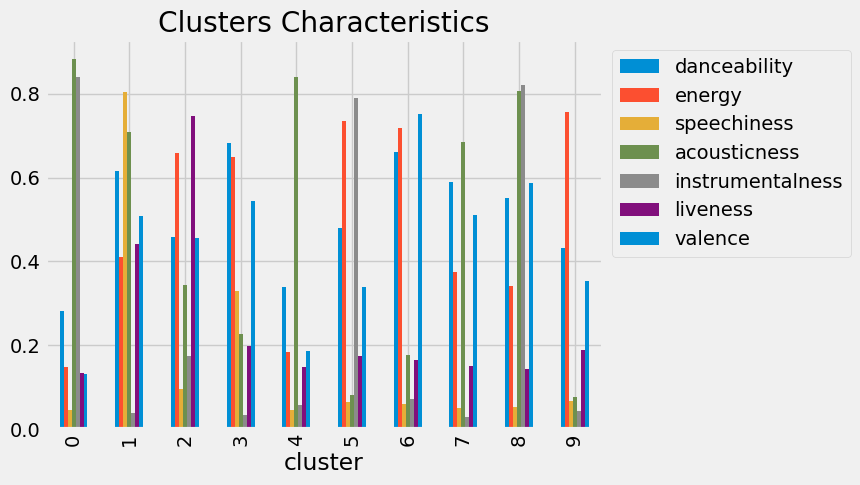

In [43]:
#VISUALIZE CHARACTERISTICS
gb.plot(kind = 'bar')
plt.title('Clusters Characteristics')
plt.legend(bbox_to_anchor=(1,1))
plt.show()